In [72]:
#need to load the data
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import cv2
import os
from PIL import Image


In [73]:
df=pd.read_csv("./Data Sets/pickachu/train.csv")
pokemon_names=df['NameOfPokemon'].values
pokemon_string,match=np.unique(pokemon_names,return_inverse=True)


In [74]:
print(len(df))
df.columns
type(df['ImageId'][1])
pokemon_string
match[9]
df.iloc[9]


304


ImageId          305.jpg
NameOfPokemon    Pikachu
Name: 9, dtype: object

In [75]:
folder='./Data Sets/pickachu/Images/'
images = []
labels=[]
for filename in os.listdir(folder):
    i=os.path.join(folder,filename)
    for image_no in range(304):
        if(filename==df['ImageId'][image_no]):
            img = cv2.imread(i)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(100,100,))
            img=np.reshape(img,(1,-1))
            images.append(img)
            labels.append(match[image_no])
images_data=np.array(images)
labels=np.array(labels)

In [76]:
images_data

array([[[145, 190, 232, ...,  79, 139, 211]],

       [[255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0]],

       [[255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 252, 252, 252]]], dtype=uint8)

In [77]:
images_data.shape

(304, 1, 30000)

In [78]:
images_data=np.reshape(images_data,(images_data.shape[0],-1))

In [79]:
images_data.shape

(304, 30000)

In [80]:
images_data

array([[145, 190, 232, ...,  79, 139, 211],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 252, 252, 252]], dtype=uint8)

In [81]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
labels.shape

(304,)

In [83]:
def Draw_image(image):
    image1=np.reshape(image,(100,100,3))
    plt.axis("off")
    plt.imshow(image1)
   
   
    return

In [84]:

import random

In [85]:
combined=list(zip(images_data,labels))
random.shuffle(combined)
images_data,labels=zip(*combined)

In [86]:
images_data=np.array(images_data)
labels=np.array(labels)

In [87]:
type(images_data)

numpy.ndarray

In [88]:
images_data.shape

(304, 30000)

In [89]:
labels.shape

(304,)

# svm

In [90]:
class SVM:
    def __init__(self,c=0.1):
        self.c=c
        self.w=0
        self.b=0
        
    def hingeloss(self,w,b,x,y):
        loss=0.0
        loss+=0.5*np.dot(w,w.T)
        m=x.shape[0]
        for i in range(m):
            ti=y[i]*(np.dot(w,x[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]
    def train(self,x,y,batch_size=50,learning_rate=0.001,max_itr=100):
        no_of_features=x.shape[1]
        no_of_samples=x.shape[0]
        n=learning_rate
        c=self.c
        w=np.zeros((1,no_of_features))
        bias=0
        losses=[]
        l=self.hingeloss(w,bias,x,y)
        losses.append(l)
        weight=[]
        weight.append(w)
        biases=[]
        biases.append(bias)
        for i in range(max_itr):
            #traing loop
           
            #batch gradient decenst
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                #iterate over all examples
                for j in range(batch_start,batch_start+batch_size):
                    if(j<no_of_samples):
                        ti=y[j]*(np.dot(w,x[j].T)+bias)
                        if ti>=1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*y[j]*x[j]
                            gradb+=c*y[j]
                w=w-n*w+n*gradw
                weight.append(w)
                bias=bias+n*gradb
                biases.append(bias)
                l=self.hingeloss(w,bias,x,y)
                losses.append(l)
        self.w=w
        self.b=bias
        return w,bias,losses
    def plothyperplane(self,w1,w2,b):
        plt.figure(figsize=(12,12))
        x_1=np.linspace(-4,4,100)
        x_2=-(w1*x_1+b)/w2
        plt.plot(x_1,x_2)
        plt.scatter(x[:,0],x[:,1],c=y)
        
        

### data group by classes

In [91]:
no_of_classes=len(pokemon_string)

In [103]:
def Classwise_data(images_data,labels):
    class_data={}
    for i in range(no_of_classes):
        class_data[i]=[]
    for i in range(images_data.shape[0]):
        class_data[labels[i]].append(images_data[i])
    for i in range(no_of_classes):
        class_data[i]=np.array(class_data[i])
    return class_data

def merge_two_classes(x,y):
    l1=x.shape[0]
    l2=y.shape[0]
    merged_data=np.zeros((l1+l2,x.shape[1]))
    merged_data[:l1,:]=x
    merged_data[l1:,:]=y
    merged_labels=np.zeros((l1+l2,))
    merged_labels[:l1]=1
    merged_labels[l1:]=-1
    merged=list(zip(merged_data,merged_labels))
    random.shuffle(merged)
    merged_data,merged_labels=zip(*merged)
    return np.array(merged_data),np.array(merged_labels)
    
#nc2 classifiers
svm_classifier={}
def training_nc2_classifiers(images_data,labels):
        class_data=Classwise_data(images_data,labels)
        mysvm=SVM()
        
        for i in range(no_of_classes):
            svm_classifier[i]={}
        for i in range(no_of_classes):
            for j in range(i+1,no_of_classes):
                merged_data,merged_labels=merge_two_classes(class_data[i],class_data[j])
                w,bias,losses=mysvm.train(merged_data,merged_labels,learning_rate=0.0001)
                plt.plot(losses)
                plt.show()
                svm_classifier[i][j]=(w,bias)
                
        return svm_classifier

def binary_predict(x,w,b):
    ti=(np.dot(w,x.T)+b)
    if(ti>=0):
        return 1
    else:
        return -1
      
      
    
def predict(x):
    count=np.zeros(no_of_classes)
    for i in range(no_of_classes):
        for j in range(i+1,no_of_classes):
            w,b=svm_classifier[i][j]
            z=binary_predict(x,w,b)
            if(z==1):
                count[i]+=1
            else:
                count[j]+=1
    return np.argmax(count)
    
    

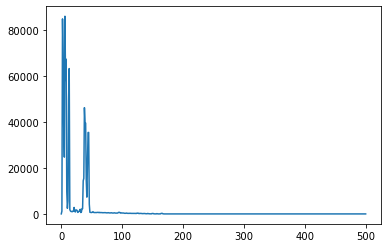

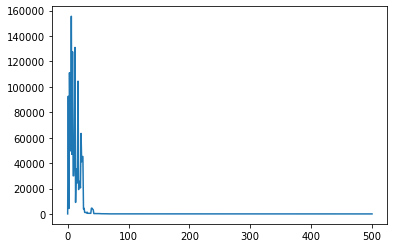

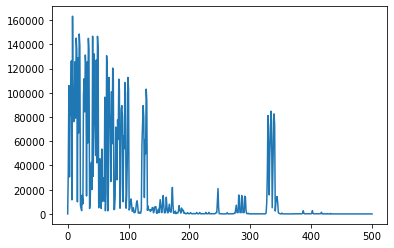

In [104]:
svm_classifier=training_nc2_classifiers(images_data,labels)

In [105]:
pokemon_string[predict(images_data[10])]

'Charmander'

In [106]:
labels[10]

1

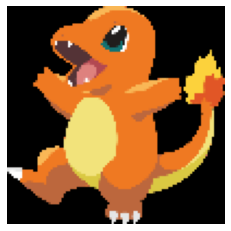

In [107]:
Draw_image(images_data[10])

In [108]:

count=0
for i in range(images_data.shape[0]):
    if(predict(images_data[i])==labels[i]):
        count+=1
accuracy=count/images_data.shape[0]*100


In [109]:
accuracy

100.0

### prepare test data

In [110]:
test_df=pd.read_csv("./Data Sets/pickachu/test.csv")
len(test_df)
test_df['ImageId'][1]

'2236.jpg'

In [111]:
folder='./Data Sets/pickachu/Images/'
test_images = []
for image_no in range(len(test_df)):
    for filename in os.listdir(folder):
         if(filename==test_df['ImageId'][image_no]):
                i=os.path.join(folder,filename)
                img = cv2.imread(i)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img=cv2.resize(img,(100,100))
                img=np.reshape(img,(1,-1))
                test_images.append(img)
test_images=np.array(test_images)
test_images=np.reshape(test_images,(test_images.shape[0],-1))
print(test_images.shape)


(123, 30000)


Bulbasaur


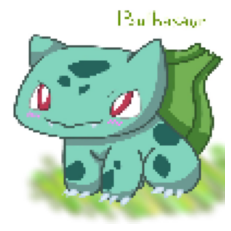

Charmander


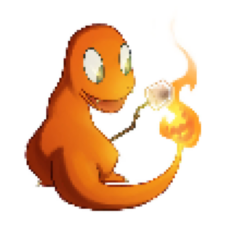

Bulbasaur


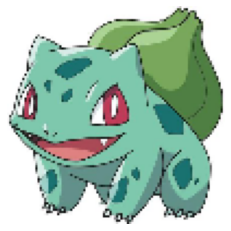

Charmander


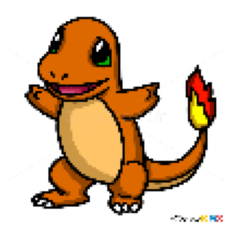

Pikachu


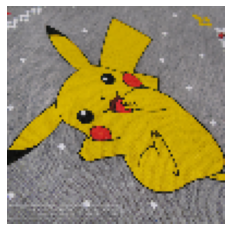

Pikachu


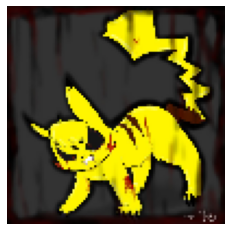

Pikachu


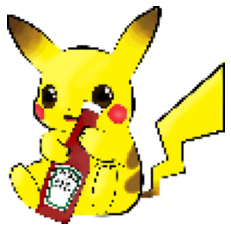

Bulbasaur


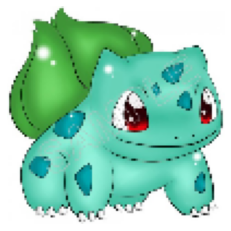

Bulbasaur


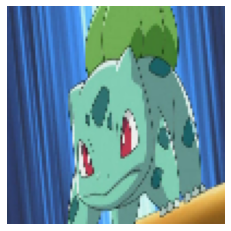

Charmander


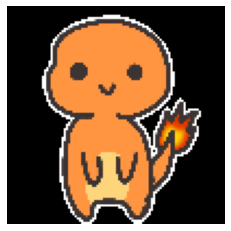

Bulbasaur


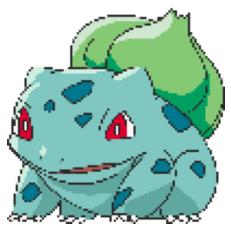

Bulbasaur


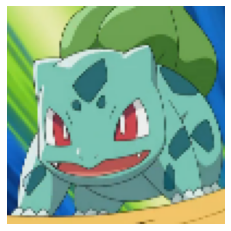

Bulbasaur


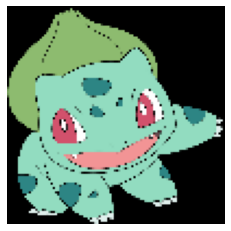

Bulbasaur


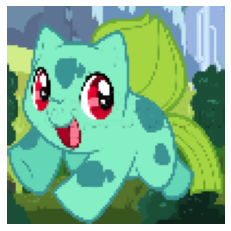

Charmander


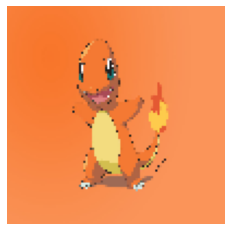

Bulbasaur


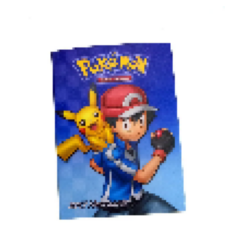

Charmander


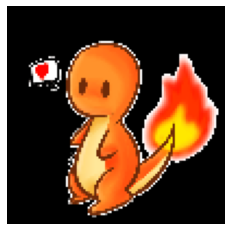

Charmander


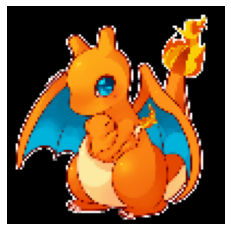

Pikachu


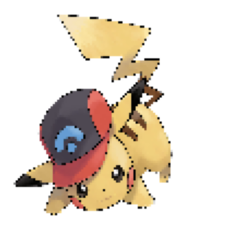

Charmander


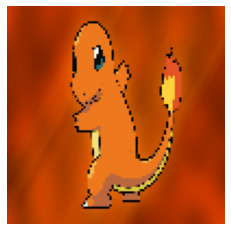

Pikachu


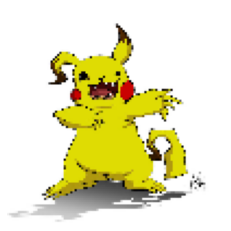

Bulbasaur


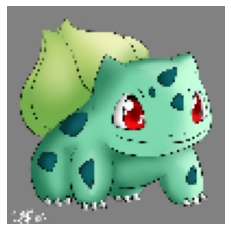

Charmander


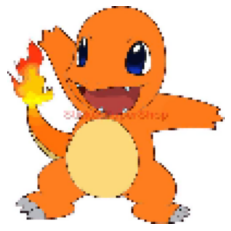

Bulbasaur


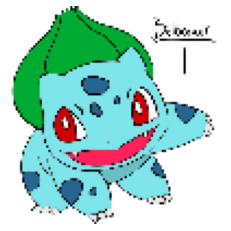

Pikachu


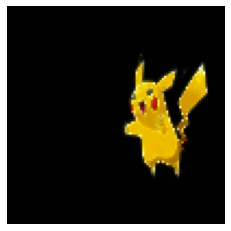

Charmander


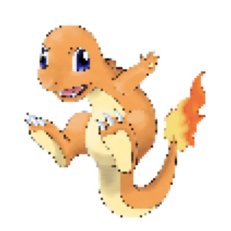

Bulbasaur


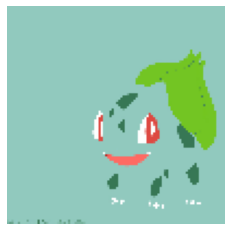

Bulbasaur


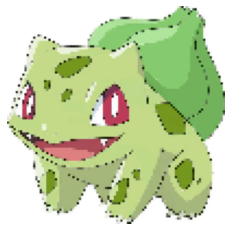

Pikachu


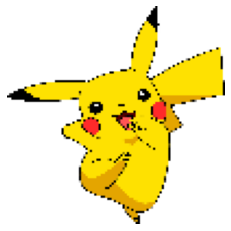

Pikachu


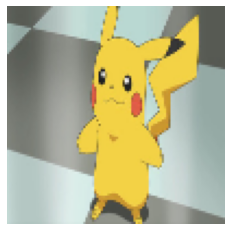

Pikachu


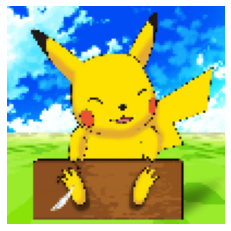

Pikachu


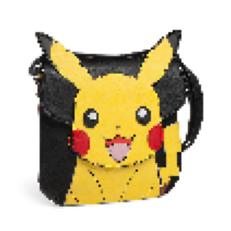

Charmander


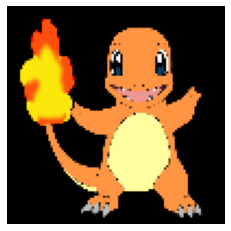

Bulbasaur


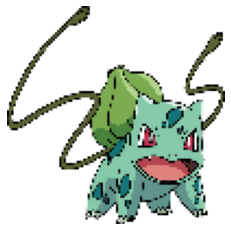

Pikachu


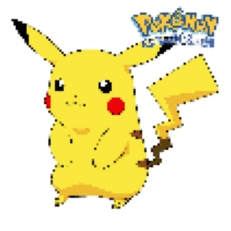

Bulbasaur


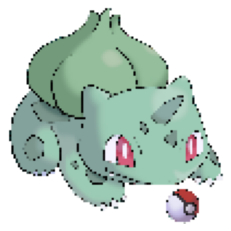

Bulbasaur


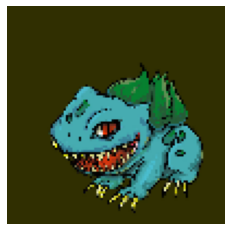

Bulbasaur


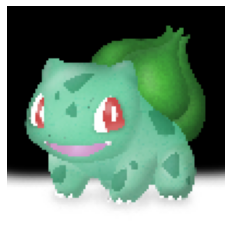

Charmander


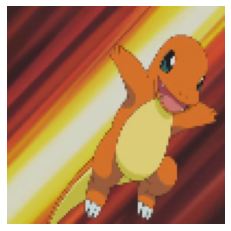

Bulbasaur


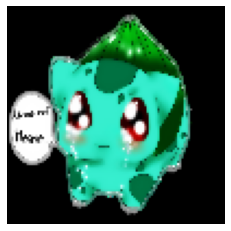

Bulbasaur


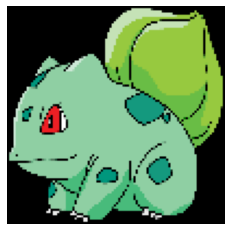

Charmander


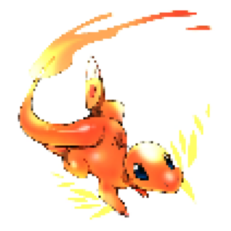

Pikachu


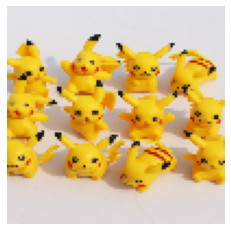

Charmander


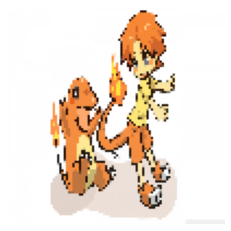

Charmander


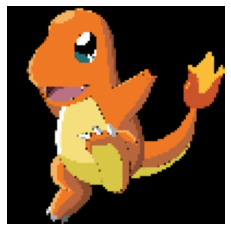

Bulbasaur


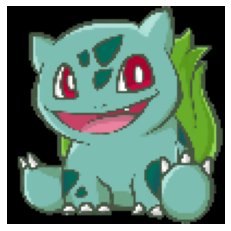

Charmander


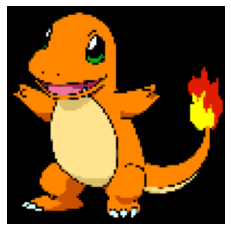

Bulbasaur


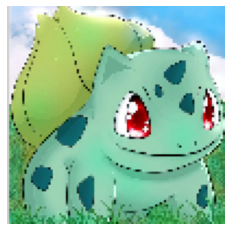

Charmander


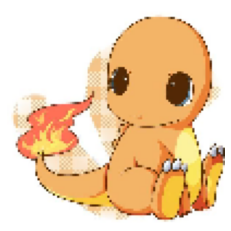

Charmander


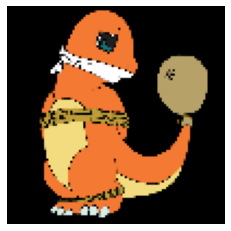

Pikachu


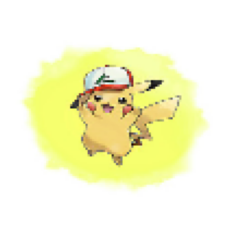

Charmander


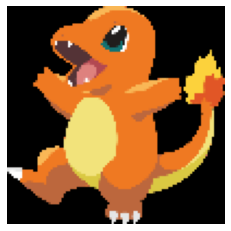

Pikachu


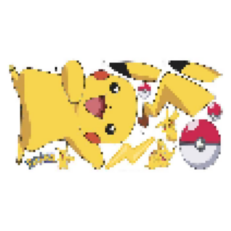

Bulbasaur


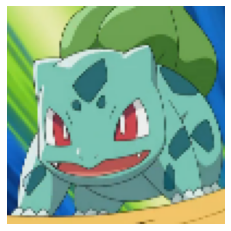

Charmander


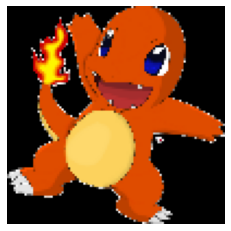

Bulbasaur


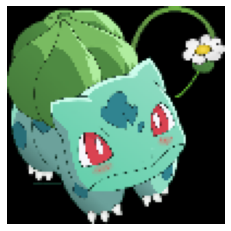

Charmander


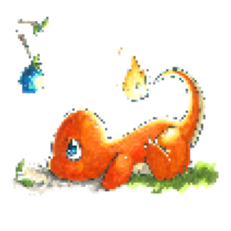

Pikachu


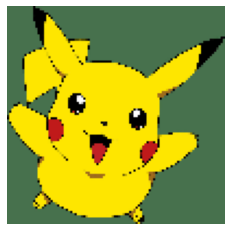

Pikachu


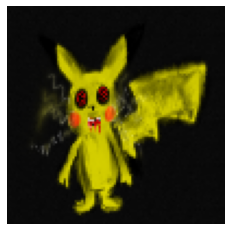

Charmander


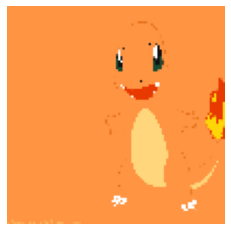

Charmander


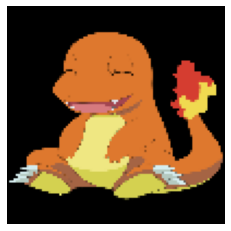

Pikachu


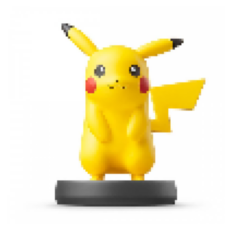

Charmander


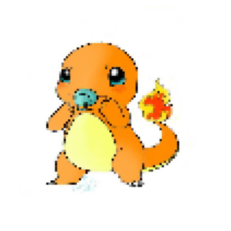

Bulbasaur


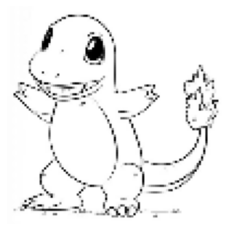

Pikachu


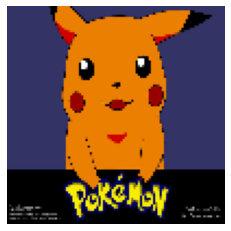

Pikachu


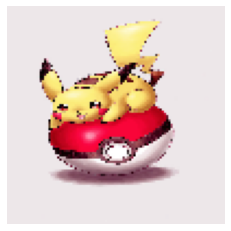

Bulbasaur


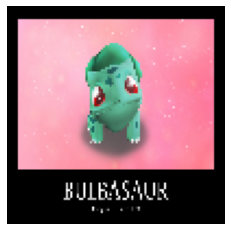

Charmander


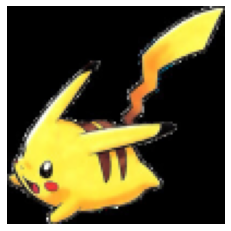

Pikachu


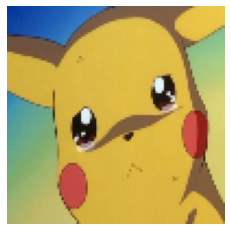

Bulbasaur


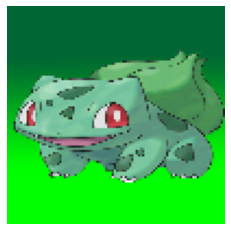

Charmander


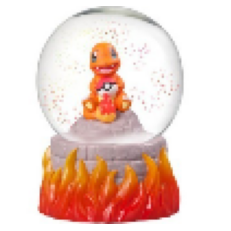

Bulbasaur


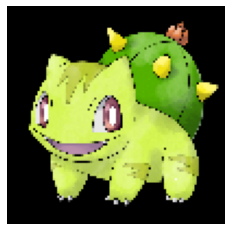

Bulbasaur


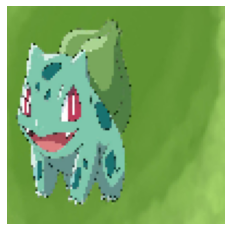

Pikachu


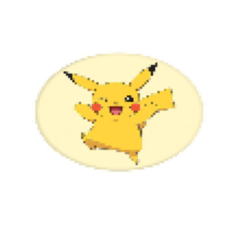

Charmander


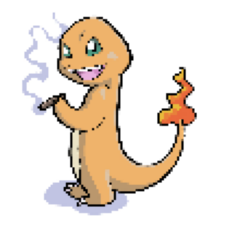

Charmander


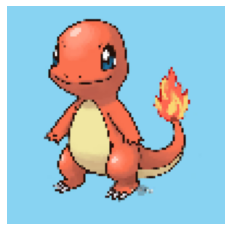

Charmander


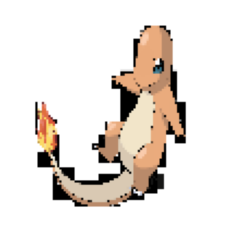

Charmander


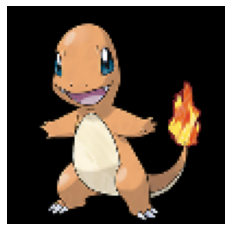

Pikachu


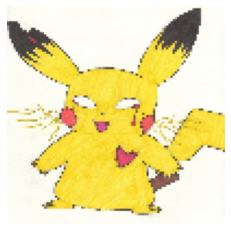

Bulbasaur


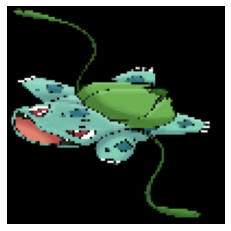

Pikachu


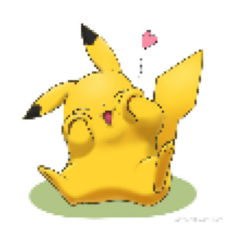

Bulbasaur


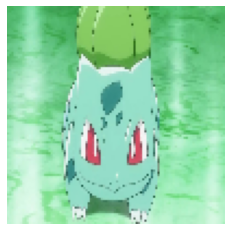

Charmander


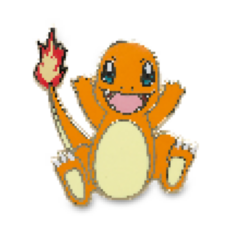

Bulbasaur


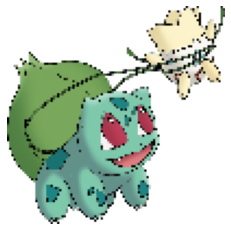

Pikachu


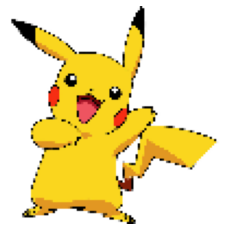

Bulbasaur


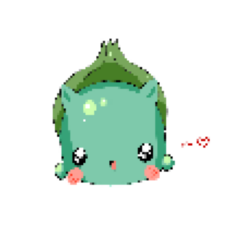

Bulbasaur


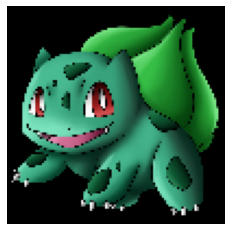

Charmander


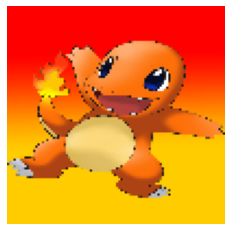

Charmander


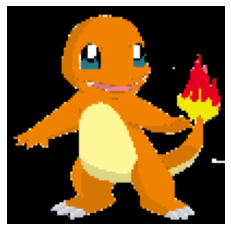

Bulbasaur


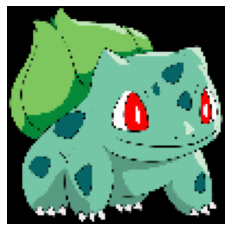

Bulbasaur


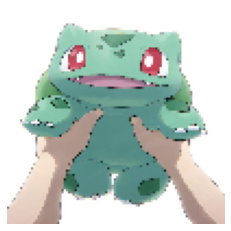

Charmander


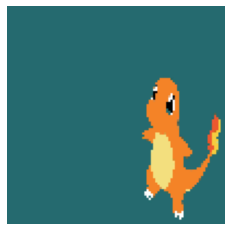

Bulbasaur


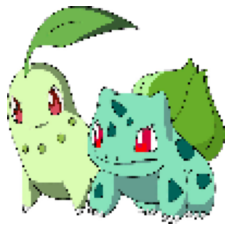

Pikachu


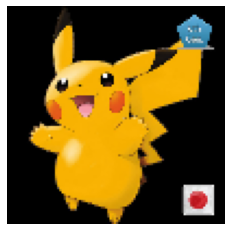

Pikachu


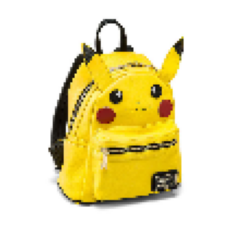

Charmander


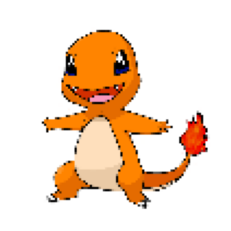

Pikachu


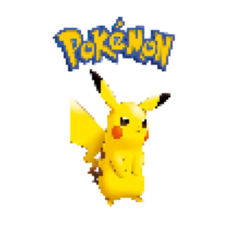

Bulbasaur


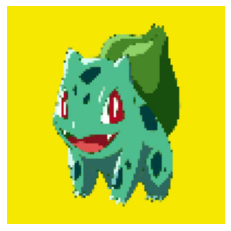

Pikachu


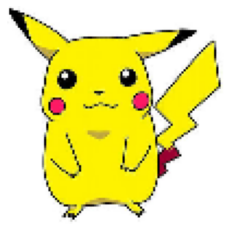

Charmander


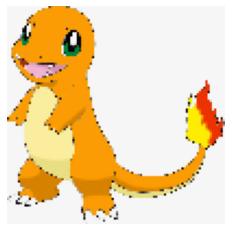

Bulbasaur


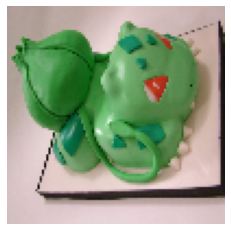

Bulbasaur


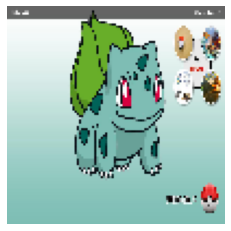

Bulbasaur


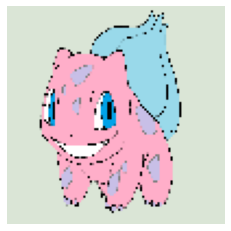

Pikachu


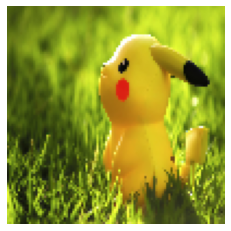

Charmander


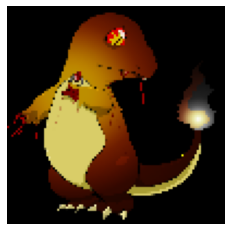

Pikachu


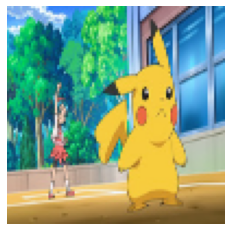

Pikachu


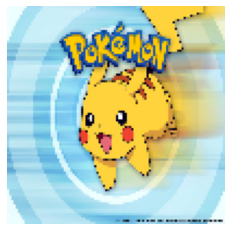

Pikachu


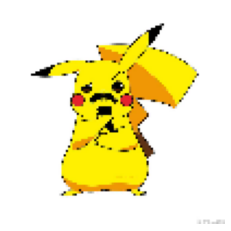

Charmander


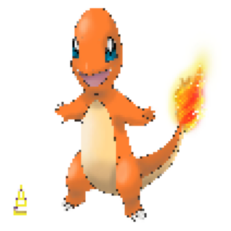

Bulbasaur


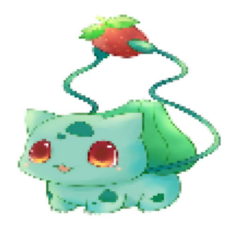

Pikachu


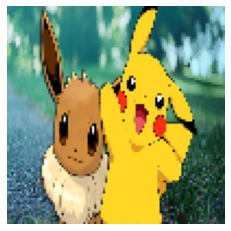

Charmander


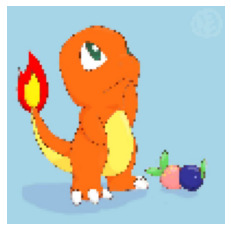

Charmander


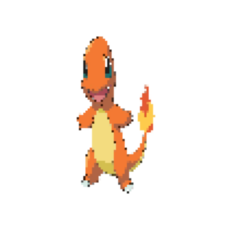

Charmander


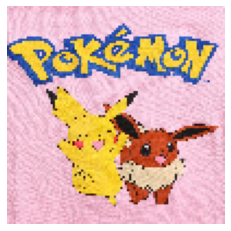

Charmander


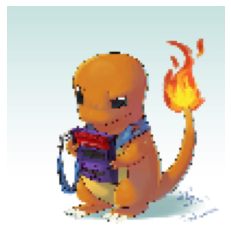

Pikachu


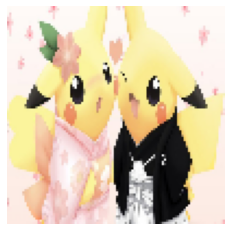

Pikachu


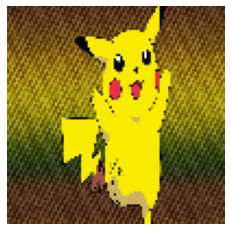

Pikachu


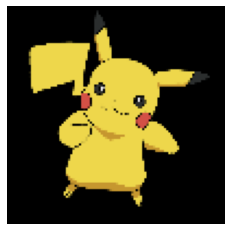

Bulbasaur


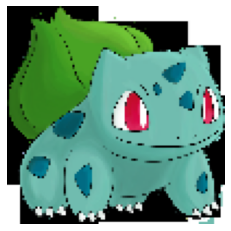

Pikachu


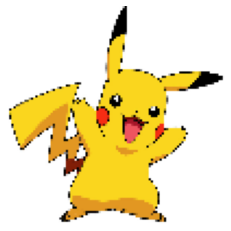

Charmander


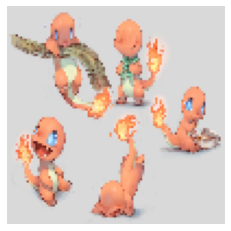

Bulbasaur


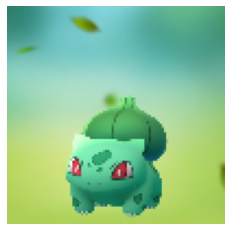

Pikachu


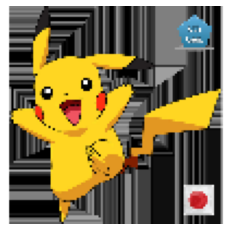

In [112]:
test_labels=[]
for i in range(test_images.shape[0]):
    test_labels.append(pokemon_string[predict(test_images[i])])
    print(pokemon_string[predict(test_images[i])])
    Draw_image(test_images[i])
    plt.show()
test_labels=np.array(test_labels)
test_df.insert(1,"NameOfPokemon",test_labels)
   

In [113]:
test_df.to_csv("./Data Sets/pickachu/test_solution.csv",index=False)